In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 8s 0us/step


In [3]:
image_count=len(list(dataset_url))
print(image_count)

87


In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [5]:
classes= os.listdir(data_dir)
print(classes)

['roses', 'sunflowers', 'daisy', 'tulips', 'LICENSE.txt', 'dandelion']


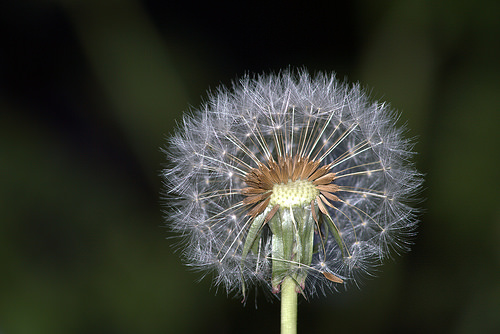

In [6]:
dandelion = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[0]))

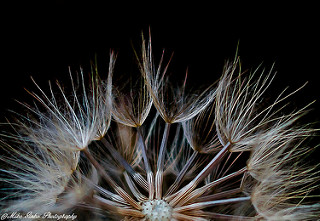

In [7]:
PIL.Image.open(str(dandelion[1]))

In [8]:
 batch_size=32
 img_height=200
 img_width=200

In [9]:
trains=tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,subset='training',seed=123,image_size=(img_height,img_width),batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [10]:
vals=tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,subset='validation',seed=123,image_size=(img_height,img_width),batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [11]:
class_names = trains.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


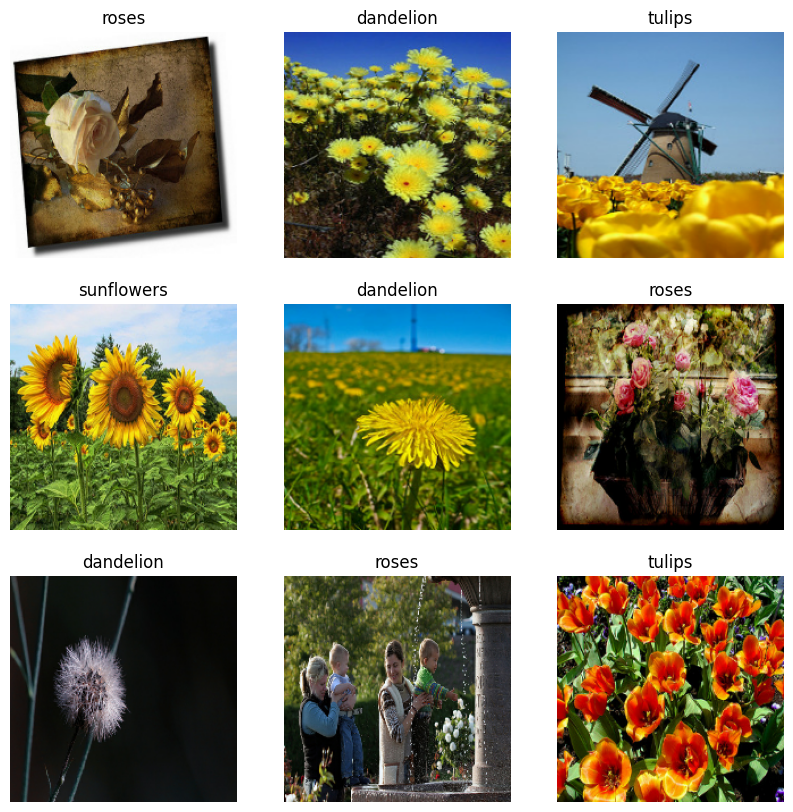

In [12]:
#Visualization
plt.figure(figsize=(10,10))
for images,labels in trains.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



In [13]:
for image_batch, labels_batch in trains:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 200, 200, 3)
(32,)


In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = trains.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = vals.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
normalization_layer = layers.Rescaling(1./255)

In [16]:
normalized_ds = trains.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.97619516


In [17]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        1

In [20]:
epochs=10
history = model.fit(
  trains,
  validation_data=vals,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 165s 2s/step - loss: 1.3257 - accuracy: 0.4462 - val_loss: 1.1377 - val_accuracy: 0.5232
Epoch 2/10
92/92 [==============================] - 164s 2s/step - loss: 0.9894 - accuracy: 0.6049 - val_loss: 0.9814 - val_accuracy: 0.6104
Epoch 3/10
92/92 [==============================] - 164s 2s/step - loss: 0.7994 - accuracy: 0.6877 - val_loss: 0.8894 - val_accuracy: 0.6376
Epoch 4/10
92/92 [==============================] - 164s 2s/step - loss: 0.5853 - accuracy: 0.7892 - val_loss: 1.2193 - val_accuracy: 0.5817
Epoch 5/10
92/92 [==============================] - 170s 2s/step - loss: 0.3688 - accuracy: 0.8702 - val_loss: 1.2129 - val_accuracy: 0.6335
Epoch 6/10
92/92 [==============================] - 164s 2s/step - loss: 0.2036 - accuracy: 0.9332 - val_loss: 1.4076 - val_accuracy: 0.6458
Epoch 7/10
92/92 [==============================] - 163s 2s/step - loss: 0.1381 - accuracy: 0.9591 - val_loss: 1.5892 - val_accuracy: 0.6131
Epoch 8/10
92